# Gandhi_Mohit_Assignment1 - Sean Lahman's Baseball Database Analysis

In [1]:
# The database contains complete batting and pitching statistics from 1871 to 2016, plus fielding statistics, 
# standings, team stats, managerial records, post-season data, and more. I have used appropriate libraries 
# to perform required operations on the database.

GitHub link ->  https://github.com/mohitgandhi2910/projects-in-python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1
# Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [3]:
df = pd.read_csv('Batting.csv')

# Question 2
# Print out the dimensions and info about the dataframe you just created

In [4]:
df.shape

(102816, 25)

In [5]:
df.index

RangeIndex(start=0, stop=102816, step=1)

In [6]:
df.columns

Index(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'stint',
       'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [8]:
df.count()

playerID     102816
nameFirst    102816
nameLast     102816
birthYear    102816
yearID       102816
stint        102816
teamID       102816
lgID         102079
G            102816
AB           102816
R            102816
H            102816
2B           102816
3B           102816
HR           102816
RBI          102392
SB           101516
CS            79360
BB           102816
SO            94978
IBB           66251
HBP          100006
SH            96478
SF            66782
GIDP          76706
dtype: int64

# Question 3
# How many players have hit 40 or more HRs in one single season? (Number only)

In [9]:
df1 = df[(df['HR']>=40)]
df2 = df1['playerID'].unique()
df2.shape[0]

142

# Question 4
# How many players have hit more than 600 HRs for their career? (Dataframe)

In [10]:
by_playerId = df[df['HR']>=0].groupby('playerID').sum()
by_playerId.reset_index(inplace=True)
df3 = by_playerId[by_playerId['HR']>600][['playerID','HR']]
df3.reset_index(inplace=True)
del df3['index']
df3

,playerID,HR
0,aaronha01,755
1,bondsba01,762
2,griffke02,630
3,mayswi01,660
4,rodrial01,696
5,ruthba01,714
6,sosasa01,609
7,thomeji01,612


# Question 5
# How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [11]:
df4 = df[(df['2B'] >= 40) & (df['3B'] >= 10) & (df['H'] >= 200) & (df['HR'] >= 30)]
df4.reset_index(inplace=True)
del df4['index']
df5 = df4['playerID'].unique()
df5.shape[0]

11

# Question 6
# How many players have had 100 or more SBs in a season? (Dataframe)

In [17]:
# I have all player rows with SB's greater than 100 in a season.
df6 = df[(df['SB'] >= 100)]
df6.reset_index(inplace=True)
df7 = df6[df6['SB'] >= 100][['playerID','SB']]
df8 = df7#.drop_duplicates(['playerID'])
df8.reset_index(inplace=True)
del df8['index']
df8

,playerID,SB
0,brownpe01,103.0
1,comisch01,117.0
2,fogarji01,102.0
3,lathaar01,129.0
4,nicolhu01,138.0
5,wardjo01,111.0
6,lathaar01,109.0
7,nicolhu01,103.0
8,hamilbi01,111.0
9,hamilbi01,102.0


In [18]:
# I have player rows with SB's greater than 100 in a season and removed the duplicates and substituted them with
# "how many" times a player achieved that feat.
player_id = []
for i in df7.playerID:
   player_id.append(df7[df7.playerID == i].reset_index(drop=True)["playerID"][0])
df_temp = pd.DataFrame(player_id, columns=["player_id"])
df_temp.player_id.value_counts()

colemvi01    3
henderi01    3
hamilbi01    3
nicolhu01    2
lathaar01    2
wardjo01     1
brownto01    1
brocklo01    1
brownpe01    1
comisch01    1
fogarji01    1
willsma01    1
Name: player_id, dtype: int64

# Question 7
# How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [19]:
df11 = df[(df['yearID'] >= 1960) & (df['yearID'] <= 1969)]
df9 = df11[df11['HR']>0].groupby('playerID').sum()
df9.reset_index(inplace=True)
df10 = df9[df9['HR']>200][['playerID','HR']]
df10.reset_index(inplace=True)
del df10['index']
df10

,playerID,HR
0,aaronha01,375
1,allisbo01,225
2,bankser01,269
3,cashno01,278
4,cepedor01,254
5,colavro01,245
6,howarfr01,288
7,kalinal01,210
8,killeha01,393
9,mantlmi01,256


# Question 8
# Who has hit the most HRs in history? (Dataframe)

In [20]:
by_playerId = df[df['HR']>0].groupby('playerID').sum()
by_playerId_mostHR = by_playerId['HR'].max()
by_playerId.reset_index(inplace=True)
df12_mostHR = by_playerId[by_playerId['HR']==by_playerId_mostHR][['playerID','HR']]
df12_mostHR.reset_index(inplace=True)
del df12_mostHR['index']
df12_mostHR

,playerID,HR
0,bondsba01,762


# Question 9
# Who had the most hits in the 1970s? (Dataframe)

In [21]:
df_1970s = df[(df['yearID'] >= 1970) & (df['yearID'] <= 1979)]
df_hits = df_1970s[df_1970s['H']>0].groupby('playerID').sum()
by_playerId_mostHits = df_hits['H'].max()
df_hits.reset_index(inplace=True)
df_mostHits1970s = df_hits[df_hits['H']==by_playerId_mostHits][['playerID','H']]
df_mostHits1970s.reset_index(inplace=True)
del df_mostHits1970s['index']
df_mostHits1970s

,playerID,H
0,rosepe01,2045


# Question 10
# Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [22]:
# I have defined all additional variables in a new dataframe and for additional variables,
# I have used formulas given in the class and not used the formula given on the internet websites
df_add = pd.read_csv('Batting.csv')
df_add['PA'] = (df_add.BB + df_add.AB + df_add.IBB + df_add.SH + df_add.SF)
df_add['OBP'] = (df_add.H + df_add.BB + df_add.IBB + df_add.SH + df_add.SF)/df_add.AB
df_add.dropna()
df_add[(df_add['PA']>=500) & (df_add['yearID']==1977)].sort_values('OBP',ascending=0).head().reset_index()

,index,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
0,55273,singlke01,Ken,Singleton,1947,1977,1,BAL,AL,152,...,1.0,107,101.0,13.0,2.0,0.0,6.0,15.0,662.0,0.563433
1,55280,smithre06,Reggie,Smith,1945,1977,1,LAN,NL,148,...,5.0,104,76.0,11.0,3.0,1.0,7.0,5.0,611.0,0.559426
2,55329,tenacge01,Gene,Tenace,1946,1977,1,SDN,NL,147,...,3.0,125,119.0,10.0,13.0,2.0,4.0,5.0,578.0,0.556064
3,54820,hargrmi01,Mike,Hargrove,1949,1977,1,TEX,AL,153,...,5.0,103,59.0,7.0,6.0,8.0,6.0,13.0,649.0,0.540952
4,54603,carewro01,Rod,Carew,1945,1977,1,MIN,AL,155,...,13.0,69,55.0,15.0,3.0,1.0,5.0,6.0,706.0,0.534091


# Question 11
# Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [23]:
# I have defined all additional variables in a new dataframe and for additional variables,
# I have used formulas given in the class and not used the formula given the internet websites
df_add = pd.read_csv('Batting.csv')
df_add['Average'] = df_add.H/df_add.AB
df_add['PA'] = (df_add.BB + df_add.AB + df_add.IBB + df_add.SH + df_add.SF)
df_add[(df_add['PA']>=300) & (df_add['yearID']==2013)].sort_values('Average',ascending=0).head(8).reset_index()

,index,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Average,PA
0,97188,cabremi01,Miguel,Cabrera,1983,2013,1,DET,AL,148,...,0.0,90,94.0,19.0,5.0,0.0,2.0,19.0,0.347748,666.0
1,98062,ramirha01,Hanley,Ramirez,1983,2013,1,LAN,NL,86,...,2.0,27,52.0,3.0,3.0,0.0,2.0,5.0,0.345395,336.0
2,97300,cuddymi01,Michael,Cuddyer,1979,2013,1,COL,NL,130,...,3.0,46,100.0,5.0,2.0,0.0,3.0,13.0,0.331288,543.0
3,97825,mauerjo01,Joe,Mauer,1983,2013,1,MIN,AL,113,...,1.0,61,89.0,7.0,0.0,0.0,2.0,7.0,0.323596,515.0
4,98293,troutmi01,Mike,Trout,1991,2013,1,LAA,AL,157,...,7.0,110,136.0,10.0,9.0,0.0,8.0,8.0,0.322581,717.0
5,97651,johnsch05,Chris,Johnson,1984,2013,1,ATL,NL,142,...,0.0,29,116.0,5.0,2.0,0.0,2.0,20.0,0.321012,550.0
6,97437,freemfr01,Freddie,Freeman,1989,2013,1,ATL,NL,147,...,0.0,66,121.0,10.0,7.0,0.0,5.0,10.0,0.319419,632.0
7,98043,puigya01,Yasiel,Puig,1990,2013,1,LAN,NL,104,...,8.0,36,97.0,6.0,11.0,0.0,3.0,6.0,0.319372,427.0


# Question 12
# Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [24]:
df_1940s = df[(df['yearID'] >= 1940) & (df['yearID'] <= 1949)]
df_hits_1940s = df_1940s[df_1940s['H']>=0].groupby('playerID').sum()
df_leader = df_hits_1940s.sort_values('H',ascending=0)
df_leader.reset_index(inplace=True)
df_leader_hits = df_leader[['playerID','H']]
df_leader_hits.head(10)

,playerID,H
0,boudrlo01,1578
1,elliobo01,1563
2,walkedi02,1512
3,musiast01,1432
4,doerrbo01,1407
5,holmeto01,1402
6,applilu01,1376
7,nichobi01,1328
8,marioma01,1310
9,cavarph01,1304


# Question 13
# Who led MLB with the most hits the most times?  And how many times?  (Dataframe or Number)

In [75]:
# I have created a list and appended it with players having maximum hits for that season
# Then I have used count values function to count the number of apperances of a playerID
player_id_Hits = []
for i in np.unique(df.yearID):
   player_id_Hits.append(df[df.yearID == i].sort_values(by=['H'], ascending=False).reset_index(drop=True)["playerID"][0])

df_temp = pd.DataFrame(player_id_Hits, columns=["player_id"])
df_temp.player_id_Hits.value_counts()

suzukic01    6
rosepe01     5
cobbty01     5
musiast01    5
lajoina01    4
gwynnto01    4
barnero01    4
puckeki01    3
keelewi01    3
aaronha01    3
broutda01    3
pinsova01    2
mcveyca01    2
jacksjo01    2
altuvjo01    2
beaumgi01    2
molitpa01    2
peskyjo01    2
aloufe01     2
ashburi01    2
kleinch01    2
jeterde01    2
bicheda01    2
carewro01    2
burkeje01    2
wanerpa01    2
hornsro01    2
beltrad01    1
youngmi02    1
davisto02    1
            ..
soriaal01    1
travice01    1
muelldo01    1
orrda01      1
ansonca01    1
startjo01    1
brownto01    1
holmeto01    1
whitede01    1
hermabi01    1
thompsa01    1
wellsve01    1
kalinal01    1
brettge01    1
ripkeca01    1
odoulle01    1
wolfji01     1
cashda01     1
brownpe01    1
clemero01    1
riceji01     1
radclri01    1
hinespa01    1
simmoal01    1
kellge01     1
delahed01    1
heilmha01    1
wanerll01    1
boggswa01    1
mccorfr01    1
Name: player_id, Length: 96, dtype: int64

# Question 14
# Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [25]:
by_games=df.groupby('playerID').sum().sort_values('G',ascending=0)
df_games=pd.DataFrame(by_games['G']).head()
df_mostgames = df_games.rename(columns={'G':'Games'})
df_mostgames

,Games
playerID,
rosepe01,3562
yastrca01,3308
aaronha01,3298
henderi01,3081
cobbty01,3035


# Question 15
# How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [26]:
df15 = df.groupby('playerID').sum()
by_hits_HR = df15[(df15['H']>3000) & (df15['HR']>=500)]
by_hits_HR.shape[0]

5

# Question 16
# How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [27]:
df_HR_1988 = df[df['yearID'] == 1988].sum()['HR']
df_HR_1988

3180

# Question 17
# Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [28]:
df_add = pd.read_csv('Batting.csv')
df_add['PA'] = (df_add.BB + df_add.AB + df_add.IBB + df_add.SH + df_add.SF)
df_add['avg'] = df_add.H / df_add.AB
df_add.dropna()
df_top3 = df_add[(df_add['nameFirst']=='Wade') & (df_add['nameLast']=='Boggs')].groupby(['yearID']).sum().reset_index().iloc[:,[0,4,21]].sort_values('avg',ascending=[0]).head(3).reset_index()
del df_top3['index']
df_top3

,yearID,AB,avg
0,1985,653,0.367534
1,1988,584,0.366438
2,1987,551,0.362976


# Question 18
# Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [29]:
df_add = pd.read_csv('Batting.csv')
df_add['PA'] = (df_add.BB + df_add.AB + df_add.IBB + df_add.SH + df_add.SF)
df_add['OBP'] = (df_add.H + df_add.BB + df_add.IBB + df_add.SH + df_add.SF)/df_add.AB
df_add[(df_add['PA']>=400) & (df_add['yearID']==1995)].sort_values('OBP',ascending=0).reset_index().head(5)

,index,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
0,73996,thomafr04,Frank,Thomas,1968,1995,1,CHA,AL,145,...,2.0,136,74.0,29.0,6.0,0.0,12.0,14.0,670.0,0.667343
1,73578,martied01,Edgar,Martinez,1963,1995,1,SEA,AL,145,...,3.0,116,87.0,19.0,8.0,0.0,4.0,11.0,650.0,0.628180
2,73611,mcgwima01,Mark,McGwire,1963,1995,1,OAK,AL,104,...,1.0,88,77.0,5.0,11.0,0.0,6.0,9.0,416.0,0.586751
3,73002,bondsba01,Barry,Bonds,1964,1995,1,SFN,NL,144,...,10.0,120,83.0,22.0,5.0,0.0,4.0,12.0,652.0,0.583004
4,73145,davisch01,Chili,Davis,1960,1995,1,CAL,AL,119,...,3.0,89,79.0,12.0,0.0,0.0,9.0,12.0,534.0,0.577830


# Question 19
# Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [30]:
#I have totaled all 3b's player wise and then filtered out player with the maximum value
by_seasons = df[(df['yearID'] == 1922) | (df['yearID'] == 1925) | (df['yearID'] == 1926) | (df['yearID'] == 1928)]
by_seasons_leader = by_seasons.groupby('playerID').sum().sort_values('3B',ascending=0)
df_leader = by_seasons_leader[by_seasons_leader['3B']>0].head(1)
df_leader

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,
walkecu01,7584,7701,4,571,2088,335,652,97,59,30,311.0,47.0,15.0,222,122.0,NaN,5.0,81.0,NaN,NaN


# Question 20
# How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [31]:
dat1 = df_add.groupby(["playerID","yearID"]).sum()
len(dat1[(dat1['HR']>=30) & (dat1['SB']>=30)].reset_index().iloc[:,[0]].drop_duplicates(subset='playerID'))

38

# Question 21
# Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [32]:
df_add = pd.read_csv('Batting.csv')
df_add['PA'] = (df_add.BB + df_add.AB + df_add.IBB + df_add.SH + df_add.SF)
df_add['OBP'] = (df_add.H + df_add.BB + df_add.IBB + df_add.SH + df_add.SF)/df_add.AB
df_add[(df_add['PA']>=400) & (df_add['yearID']==1986)].sort_values('OBP',ascending=0).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
63320,boggswa01,Wade,Boggs,1958,1986,1,BOS,AL,149,580,...,4.0,105,44.0,14.0,0.0,4.0,4.0,11.0,707.0,0.575862


# Question 22
# Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [33]:
df_add = pd.read_csv('Batting.csv')
df_add['PA'] = (df_add.BB + df_add.AB + df_add.IBB + df_add.SH + df_add.SF)
df_add['OBP'] = (df_add.H + df_add.BB + df_add.IBB + df_add.SH + df_add.SF)/df_add.AB
df_add[(df_add['PA']>=400) & (df_add['yearID']==1997) & (df_add['lgID']=='NL')].sort_values('OBP',ascending=0).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,OBP
75505,bondsba01,Barry,Bonds,1964,1997,1,SFN,NL,159,532,...,8.0,145,87.0,34.0,8.0,0.0,5.0,13.0,716.0,0.637218


# Question 23
# Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [36]:
# I have filtered out players with HR greater than league average HR for the year 2012
df_add = pd.read_csv('Batting.csv')
df_add['PA'] = (df_add.BB + df_add.AB + df_add.IBB + df_add.SH + df_add.SF)
league_avg = df_add[df_add.yearID == 2012]["HR"].mean()
player_hr = df_add[(df_add.yearID == 2012)&(df_add.HR > league_avg)][df_add.PA >= 500]
player_hr[['playerID','HR','PA']].reset_index(drop=True)

C:\Users\mxg172130\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,playerID,HR,PA
0,ackledu01,12,675.0
1,alonsyo01,9,625.0
2,altuvjo01,7,624.0
3,alvarpe01,30,591.0
4,aokino01,10,576.0
5,avilemi01,13,544.0
6,aybarer01,8,549.0
7,barneda01,7,586.0
8,beckhgo01,16,575.0
9,beltrad01,36,657.0


# Question 24
# Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [37]:
df_add = pd.read_csv('Batting.csv')
df_add['PlayingAge'] = df_add['yearID'] - df_add['birthYear']
df_youngest = df_add.groupby(["playerID","nameFirst",'nameLast','birthYear',"PlayingAge","yearID"]).sum()['HR'].reset_index()
df_youngest = df_youngest[df_youngest['HR']>=50]
df_youngest[df_youngest['PlayingAge']==df_youngest['PlayingAge'].min()].reset_index()

,index,playerID,nameFirst,nameLast,birthYear,PlayingAge,yearID,HR
0,26282,fieldpr01,Prince,Fielder,1984,23,2007,50


# Question 25
# Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [38]:
df_add = pd.read_csv('Batting.csv')
df_add['PlayingAge'] = df_add['yearID'] - df_add['birthYear']
df_add.dropna()
df_youngest = df_add.groupby(["playerID","PlayingAge"]).sum()['HR'].groupby(["playerID"]).cumsum().reset_index()
df_youngest[df_youngest['HR']>=300].sort_values(['PlayingAge'],ascending = [1]).head()

,playerID,PlayingAge,HR
43074,jonesan01,28,301
69369,pujolal01,28,319
64767,ottme01,28,306
73216,rodrial01,28,345
27852,foxxji01,28,302


# Graph total HRs per season using bar graph(Bonus Question)

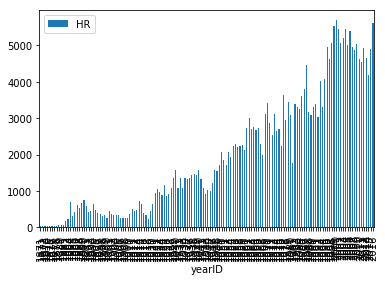

In [39]:
by_TotalHR = df[df['HR']>0].groupby('yearID').sum()
df_totalHR = by_TotalHR[by_TotalHR['HR']>0][['HR']]
df_totalHR.plot.bar()

# Using a line graph please graph the average HRs per AB (think about this) per season(Bonus Question)

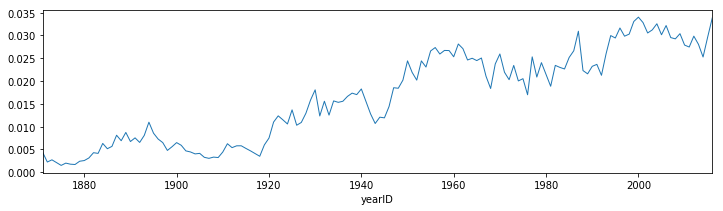

In [40]:
df_add = pd.read_csv('Batting.csv')
df_avgHR = df_add[df_add['HR']>=0].groupby('yearID').mean()['HR']
df_avgAB = df_add[df_add['AB']>=0].groupby('yearID').mean()['AB']
df_average = df_avgHR/df_avgAB
df_average.plot.line(x=df_avgHR.index,y=df_avgAB,figsize=(12,3),lw=1)

# End of Assignment